# Getting started with the practicals

***These notebooks are best viewed in Jupyter. GitHub might not display all content of the notebook properly.***

## Goal of the practical exercises

The exercises have two goals:

1. Give you the opportunity to obtain 'hands-on' experience in implementing, training and evaluation machine learning models in Python. This experience will also help you better understand the theory covered during the lectures. 

2. Occasionally demonstrate some 'exam-style' questions that you can use as a reference when studying for the exam. Note however that the example questions are (as the name suggests) only examples and do not constitute a complete and sufficient list of 'things that you have to learn for the exam'. You can recognize example questions as (parts of) exercises by <font color="#770a0a">this font color</font>.

For each set of exercises (one Python notebook such as this one $==$ one set of exercises) you have to submit deliverables that will then be graded and constitute 25% of the final grade. Thus, the work that you do during the practicals has double contribution towards the final grade: as 25% direct contribution and as a preparation for the exam that will define the other 65% of the grade.

## Deliverables

For each set of exercises, you have to submit:
1. Python functions and/or classes (`.py` files) that implement basic functionalities (e.g. a $k$-NN classifier) and 
2. A *single* Python notebook that contains the experiments, visualization and answer to the questions and math problems. *Do not submit your answers as Word or PDF documents (they will not be graded)*. The submitted code and notebook should run without errors and be able to fully reproduce the reported results.

We recommend that you clone the provided notebooks (such as this one) and write your code in them. The following rubric will be used when grading the practical work:

| Component                | Insufficient                                                                                       | Satisfactory                                                                                                                 | Excellent                                                                                                                                                                                                                                          |
|--------------------------|----------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Code**                 | Missing or incomplete code structure, runs with errors, lacks documentation                        | Self-contained, does not result in errors, contains some documentation, can be easily used to reproduce the reported results | User-friendly, well-structured (good separation of general functionality and experiments, i.e. between `.py` files and the Pyhthon notebook), detailed documentation, optimized for speed, <s>use of a version control system (such as GitHub)</s> |
| **Answers to questions** | Incorrect, does not convey understanding of the material, appears to be copied from another source | Correct, conveys good understanding of the material, description in own words                                                | Correct, conveys excellent level of understanding, makes connections between topics                                                                                                                                                                |

## A word on notation

When we refer to Python variables, we will use a monospace font. For example, `X` is a Python variable that contains the data matrix. When we refer to mathematical variables, we will use the de-facto standard notation: $a$ or $\lambda$ is a scalar variable, $\boldsymbol{\mathrm{w}}$ is a vector and $\boldsymbol{\mathrm{X}}$ is a matrix (e.g. a data matrix from the example above). You should use the same notation when writing your answers and solutions.

# Two simple machine learning models

## Preliminaries

Throughout the practical curriculum of this course, we will use the Python programming language and its ecosystem of libraries for scientific computing (such as `numpy`, `scipy`, `matplotlib`, `scikit-learn` etc). The practicals for the deep learning part of the course will use the `keras` deep learning framework. If you are not sufficiently familiar with this programming language and/or the listed libraries and packages, you are strongly advised to go over the corresponding tutorials from the ['Essential skills'](https://github.com/tueimage/essential-skills) module (the `scikit-learn` library is not covered by the tutorial, however, an extensive documentation is available [here](https://scikit-learn.org/stable/documentation.html).

In this first set of exercises, we will use two toy datasets that ship together with `scikit-learn`. 

The first dataset is named `diabetes` and contains 442 patients described with 10 features: age, sex, body mass index, average blood pressure, and six blood serum measurements. The target variable is a continuous quantitative measure of the disease (diabetes) progression one year after the baseline measurements were recorded. More information is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/diabetes.rst) and [here](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html).

The second dataset is named `breast_cancer` and is a copy of the UCI ML Breast Cancer Wisconsin (Diagnostic) datasets (more infortmation is available [here](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/descr/breast_cancer.rst) and [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). The datasets contains of 569 instances represented with 30 features that are computed from a images of a fine needle aspirate of a breast mass. The features describe characteristics of the cell nuclei present in the image. Each instance is associated with a binary target variable ('malignant' or 'benign'). 

You can load the two datasets in the following way:

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes, load_breast_cancer

diabetes = load_diabetes()

breast_cancer = load_breast_cancer()

# breast_cancer.data.shape()
print(breast_cancer['data'].shape)

(569, 30)


In the majority of the exercises in this course, we will use higher-level libraries and packages such as `scikit-learn` and `keras` to implement, train and evaluate machine learning models. However, the goal of this first set of exercises is to illustrate basic mathematical tools and machine learning concepts. Because of this, we will impose a restriction of only using basic `numpy` functionality. Furthermore, you should as much as possible restrict the use of for-loops (e.g. use a vector-to-matrix product instead of a for loop when appropriate).

If `X` is a 2D data matrix, we will use the convention that the rows of the matrix contain the samples (or instances) and the columns contain the features (inputs to the model). That means that a data matrix with a shape `(122, 13)` represents a dataset with 122 samples, each represented with 13 features. Similarly, if `Y` is a 2D matrix containing the targets, the rows correspond to the samples and the columns to the different targets (outputs of the model). Thus, if the shape of `Y` is `(122, 3)` that means that there are 122 samples and each sample is has 3 targets (note that in the majority of the examples we will only have a single target and thus the number of columns of `Y` will be 1).

You can obtain the data and target matrices from the two datasets in the following way:

In [3]:
X = diabetes.data
Y = diabetes.target[:, np.newaxis]
Y1 = diabetes.target[:,]
Y2 = diabetes.target[:]
print(Y.shape)  # with newaxis: (442, 1)
print(Y1.shape)  # w/o newaxis: (442,)
print(Y2.shape)  # w/o newaxis: (442,)

print(X.shape)
print(Y.shape)

(442, 1)
(442,)
(442,)
(442, 10)
(442, 1)


If you want to only use a subset of the available features, you can obtain a reduced data matrix in the following way:

In [4]:
Xt = diabetes.data[:, 3]
print(Xt.shape)

# use only the fourth feature
X = diabetes.data[:, np.newaxis, 3]
print(X.shape)

# use the third, and tenth features
X = diabetes.data[:, (3,9)]
print(X.shape)

(442,)
(442, 1)
(442, 2)


***Question***: Why we need to use the `np.newaxis` expression in the examples above? 

_The concept of vectors does not exist within NumPy, only n-dimensional arrays do. The use of the `np.newaxis` expression in the examples above, converts the 1D arrays into 2D arrays. In the examples above, when the array produced would be an 1D array, `np.newaxis` explicitly turns it into a 2D array with 1 column, which is equivalent to a column vector. The extra dimension allows for operations that use NumPy broadcasting._



Note that in all your experiments in the exercises, you should use and independent training and testing sets. You can split the dataset into a training and testing subsets in the following way:

In [5]:
# use the fourth feature
# use the first 300 training samples for training, and the rest for testing
X_train = diabetes.data[:300, np.newaxis, 3]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, np.newaxis, 3]
y_test = diabetes.target[300:, np.newaxis]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 1)
(300, 1)
(142, 1)
(142, 1)


## Exercises

### Linear regression

Implement training and evaluation of a linear regression model on the diabetes dataset using only matrix multiplication, inversion and transpose operations. Report the mean squared error of the model.

To get you started we have implemented the first part of this exercise (fitting of the model) as an example.

In [32]:
# add subfolder that contains all the function implementations
# to the system path so we can import them
import sys
sys.path.append('code/')

# the actual implementation is in linear_regression.py,
# here we will just use it to fit a model
from linear_regression import *

# load the dataset
# same as before, but now we use all features
X_train = diabetes.data[:300, :]
y_train = diabetes.target[:300, np.newaxis]
X_test = diabetes.data[300:, :]
y_test = diabetes.target[300:, np.newaxis]

beta = lsq(X_train, y_train)

# print the parameters
print(beta)

[[ 152.34786452]
 [ -16.57607993]
 [-254.66532396]
 [ 560.98630022]
 [ 278.91811152]
 [-393.41357305]
 [  97.05460405]
 [ -19.0023093 ]
 [ 169.46450327]
 [ 632.95050374]
 [ 114.21638941]]


In [33]:
# intercept is not multiplied with feature values
intercept = beta[0]
weigths = beta[1:]

# calculate the mean squared error
y_pred = np.dot(X_test, weigths) + intercept
lr_RSS = np.sum((y_test - y_pred)**2)
lr_MSE = lr_RSS/len(y_test)
print(f'{lr_MSE:.2f}')

2794.57


### Weighted linear regression

Assume that in the dataset that you use to train a linear regression model, there are identical versions of some samples. This problem can be reformulated to a weighted linear regression problem where the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$ (or the vector $\boldsymbol{\mathrm{y}}$ if there is only a single target/output variable) contain only the unique data samples, and a vector $\boldsymbol{\mathrm{d}}$ is introduced that gives more weight to samples that appear multiple times in the original dataset (for example, the sample that appears 3 times has a corresponding weight of 3). 

<p><font color='#770a0a'>Derive the expression for the least-squares solution of a weighted linear regression model (note that in addition to the matrices $\boldsymbol{\mathrm{X}}$ and $\boldsymbol{\mathrm{Y}}$, the solution should include a vector of weights $\boldsymbol{\mathrm{d}}$).</font></p>

$$ -2\boldsymbol{\mathrm{X}}^{T} (\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{b}})$$
Introduce diagonal weight matrix $\boldsymbol{\mathrm{D}}$ with the values of weight vector $\boldsymbol{\mathrm{d}}$ on its diagonal:
Let $E_i$ be the $n x n$ matrix with a 1 on position $(i,i)$ and zeros everywhere else and let $e_i$ be the $1 x n$ row matrix with a 1 on position $(1,i)$ and zeros everwhere else. Then:
$$\boldsymbol{\mathrm{D}}=\sum_{i=1}^{n}{E_i}\boldsymbol{\mathrm{d}}{e_i}$$

Apply weight matrix to observations:
$$\boldsymbol{\mathrm{X}} \rightarrow\boldsymbol{\mathrm{D}}\boldsymbol{\mathrm{X}};   \boldsymbol{\mathrm{y}} \rightarrow \boldsymbol{\mathrm{D}}\boldsymbol{\mathrm{y}}$$

This results in the following RSS derivative:
$$ -2 \boldsymbol{\mathrm{X}}^{T} \boldsymbol{\mathrm{D}}(\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{b}})$$
Set equal to zero:
$$ \boldsymbol{\mathrm{X}}^{T} \boldsymbol{\mathrm{D}}(\boldsymbol{\mathrm{y}} - \boldsymbol{\mathrm{X}}\boldsymbol{\mathrm{b}}) = 0$$

$$ \boldsymbol{\mathrm{X}}^{T} \boldsymbol{\mathrm{D}} \boldsymbol{\mathrm{y}} = \boldsymbol{\mathrm{X}}^{T} \boldsymbol{\mathrm{D}} \boldsymbol{\mathrm{X}} \boldsymbol{\mathrm{b}} $$


$$ (\boldsymbol{\mathrm{X}}^{T} \boldsymbol{\mathrm{D}} \boldsymbol{\mathrm{X}})^{-1}  \boldsymbol{\mathrm{X}}^{T} \boldsymbol{\mathrm{D}} \boldsymbol{\mathrm{y}} = \boldsymbol{\mathrm{b}} $$


### $k$-NN classification

Implement a $k$-Nearest neighbors classifier from scratch in Python using only basic matrix operations with `numpy` and `scipy`. Train and evaluate the classifier on the breast cancer dataset, using all features. Show the performance of the classifier for different values of $k$ (plot the results in a graph). Note that for optimal results, you should normalize the features (e.g. to the $[0, 1]$ range or to have a zero mean and unit standard deviation).

### kNN with K-Fold

Loading data...
Standardizing data...
Cross-validating...
Plotting results...


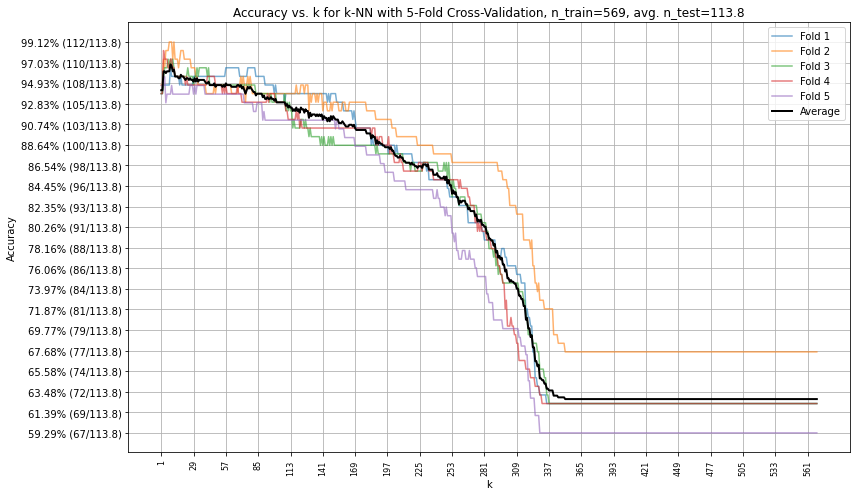

Plot saved in "Accuracy vs. k for k-NN with 5-Fold Cross-Validation, n_train=569, avg. n_test=113.8.png"


<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
def _standardize(arr):
    """Scale (standardize) a given 2D numpy array."""
    print('Standardizing data...')

    # Calculate the mean and standard deviation along the columns
    mean = np.mean(arr, axis=0)
    std = np.std(arr, axis=0)

    # Standardize the array
    standardized_arr = (arr - mean) / std

    # Handle columns with zero standard deviation (replace NaNs with 0)
    standardized_arr[np.isnan(standardized_arr)] = 0

    return standardized_arr

def compute_distance_matrix(X_train, X_test):
    """Compute the distance matrix between training and test points."""
    distances = np.zeros((X_test.shape[0], X_train.shape[0]))
    for i, test_point in enumerate(X_test):
        for j, train_point in enumerate(X_train):
            distances[i, j] = np.linalg.norm(test_point - train_point)
    return distances


def knn_predict(distance_matrix, y_train, k):
    """Predict using k-NN with the precomputed distance matrix."""
    predictions = []
    for i in range(distance_matrix.shape[0]):
        k_nearest_indices = np.argsort(distance_matrix[i])[:k]
        k_nearest_labels = y_train[k_nearest_indices]
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common_label)
    return np.array(predictions)


def evaluate_accuracy(y_true, y_pred):
    """Compute the accuracy of predictions."""
    return np.mean(y_true == y_pred)


def test_knn_for_various_k(X_train, X_test, y_train, y_test, k_values):
    """Test the k-NN classifier for various k values and return accuracies."""
    distance_matrix = compute_distance_matrix(X_train, X_test)
    accuracies = []

    for k in k_values:
        y_pred = knn_predict(distance_matrix, y_train, k)
        accuracy = evaluate_accuracy(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies


def cross_validate_knn(X, y, k_values, n_splits=5):
    """Perform k-fold cross-validation for k-NN and return accuracies for each fold."""
    print('Cross-validating...')

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    all_accuracies = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        accuracies = test_knn_for_various_k(X_train, X_test, y_train, y_test, k_values)
        all_accuracies.append(accuracies)

    return all_accuracies


def plot_cross_validation_results(k_values, all_accuracies, n_train, n_test, show_fractions=False):
    """Plot the results of k-fold cross-validation."""
    print('Plotting results...')
    plt.figure(figsize=(12, 7))

    # Plot each fold's accuracy curve
    for i, accuracies in enumerate(all_accuracies):
        plt.plot(k_values, accuracies, label=f"Fold {i+1}", alpha=0.6)

    # Plot the average accuracy curve
    avg_accuracies = np.mean(all_accuracies, axis=0)
    plt.plot(k_values, avg_accuracies, label="Average", color="black", linewidth=2)

    # Adjust the xticks for better readability
    max_n_ticks = 20
    if len(k_values) > max_n_ticks:
        nth_tick = len(k_values) // max_n_ticks  # Adjusted to `max_n_ticks` ticks
        plt.xticks(k_values[::nth_tick], rotation=90, fontsize=8)
    else:
        plt.xticks(k_values, rotation=90, fontsize=10)

    # Adjust the yticks for better readability
    min_accuracy = min([min(acc) for acc in all_accuracies])
    max_accuracy = max([max(acc) for acc in all_accuracies])
    y_ticks = np.linspace(min_accuracy, max_accuracy, max_n_ticks)
    plt.yticks(y_ticks, [f"{tick*100:.1f}%" for tick in y_ticks])

    if show_fractions:
        y_labels = [f"{acc*100:.2f}% ({int(acc*n_test)}/{n_test})" for acc in y_ticks]
        plt.yticks(y_ticks, y_labels)

    title = f"Accuracy vs. k for k-NN with {len(all_accuracies)}-Fold Cross-Validation, n_train={n_train}, avg. n_test={n_test}"
    plt.title(title)
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    #plt.savefig(title + '.png')
    print(f'Plot saved in "{title}.png"')


def main(k_values='all', show_fractions=True, n_splits=5):
    print('Loading data...')
    X, y = load_breast_cancer(return_X_y=True)
    X = _standardize(X)

    n_train = len(X)
    avg_n_test = np.around(1/n_splits * n_train, 1)

    if k_values.lower() == 'all':
        k_values = range(1, n_train+1)

    all_accuracies = cross_validate_knn(X, y, k_values, n_splits=n_splits)
    plot_cross_validation_results(
        k_values, all_accuracies, show_fractions=show_fractions, 
        n_train=n_train, n_test=avg_n_test
        )


if __name__ == "__main__":
    main(k_values='all', show_fractions=True, n_splits=5)

### kNN without K-Fold 

Accuracy for k=1: 0.9386
Accuracy for k=2: 0.9386
Accuracy for k=3: 0.9474
Accuracy for k=4: 0.9474
Accuracy for k=5: 0.9474
Accuracy for k=6: 0.9474
Accuracy for k=7: 0.9474
Accuracy for k=8: 0.9474
Accuracy for k=9: 0.9649
Accuracy for k=10: 0.9561
Accuracy for k=11: 0.9561
Accuracy for k=12: 0.9561
Accuracy for k=13: 0.9561
Accuracy for k=14: 0.9561
Accuracy for k=15: 0.9561
Accuracy for k=16: 0.9561
Accuracy for k=17: 0.9474
Accuracy for k=18: 0.9561
Accuracy for k=19: 0.9474
Accuracy for k=20: 0.9561
Accuracy for k=21: 0.9474
Accuracy for k=22: 0.9474
Accuracy for k=23: 0.9474
Accuracy for k=24: 0.9474
Accuracy for k=25: 0.9474
Accuracy for k=26: 0.9474
Accuracy for k=27: 0.9474
Accuracy for k=28: 0.9474
Accuracy for k=29: 0.9561
Accuracy for k=30: 0.9561
Accuracy for k=31: 0.9561
Accuracy for k=32: 0.9561
Accuracy for k=33: 0.9561
Accuracy for k=34: 0.9561
Accuracy for k=35: 0.9561
Accuracy for k=36: 0.9561
Accuracy for k=37: 0.9561
Accuracy for k=38: 0.9561
Accuracy for k=39: 0.

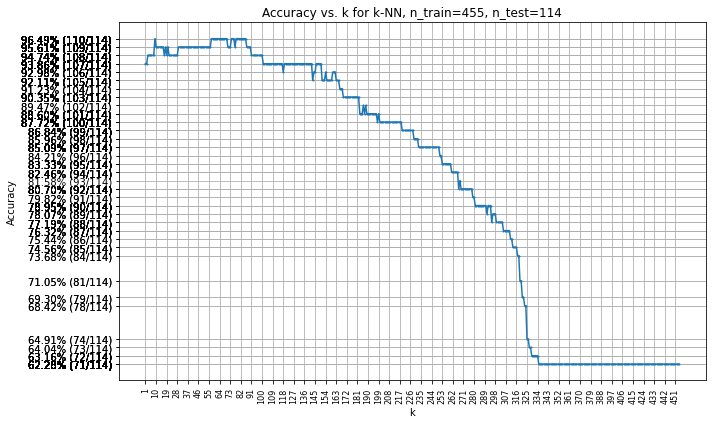

In [21]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import matplotlib.pyplot as plt


def _standardize(arr):    
    """Scale (standardize) a given array."""
    stand_arr_transposed = []
    for col in range(len(arr[0])):

        # Calculate average of the entire column.
        values = [row[col] for row in arr]
        mean = sum(values) / len(values)  

        # Calculate the standard deviation.
        std = 0
        for x in values:
            std = std + (x - mean)**2
        std = std/(len(values)-1)
        std = std**(1/2)

        # Calculate the standardized value of each datapoint in the column.
        standardized = []
        if std == 0:
            standardized = len(values)*[0]
        else:
            for i in values:
                standardX = (i - mean)/(std)
                standardized.append(standardX)
        stand_arr_transposed.append(standardized)

    stand_arr = stand_arr_transposed.T

    return stand_arr


def load_and_preprocess_data():
    """Load the dataset, split, and normalize."""
    X, y = load_breast_cancer(return_X_y=True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


def compute_distance_matrix(X_train, X_test):
    """Compute the distance matrix between training and test points."""
    distances = np.zeros((X_test.shape[0], X_train.shape[0]))
    for i, test_point in enumerate(X_test):
        for j, train_point in enumerate(X_train):
            distances[i, j] = np.linalg.norm(test_point - train_point)
    return distances


def knn_predict(distance_matrix, y_train, k):
    """Predict using k-NN with the precomputed distance matrix."""
    predictions = []
    for i in range(distance_matrix.shape[0]):
        k_nearest_indices = np.argsort(distance_matrix[i])[:k]
        k_nearest_labels = y_train[k_nearest_indices]
        most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
        predictions.append(most_common_label)
    return np.array(predictions)


def evaluate_accuracy(y_true, y_pred):
    """Compute the accuracy of predictions."""
    return np.mean(y_true == y_pred)


def test_knn_for_various_k(X_train, X_test, y_train, y_test, k_values):
    """Test the k-NN classifier for various k values and return accuracies."""
    distance_matrix = compute_distance_matrix(X_train, X_test)
    accuracies = []

    for k in k_values:
        y_pred = knn_predict(distance_matrix, y_train, k)
        accuracy = evaluate_accuracy(y_test, y_pred)
        accuracies.append(accuracy)

    return accuracies


def plot_accuracy_vs_k(k_values, accuracies, n, n_test, show_fractions=False, marker='o', linestyle='-'):
    """Plot accuracy as a function of k."""
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker=marker, markersize=1, linestyle=linestyle)
    plt.title(f"Accuracy vs. k for k-NN, n_train={n}, n_test={n_test}")
    plt.xlabel("k")
    plt.ylabel("Accuracy")
    plt.grid(True)

    # Adjust the xticks for better readability
    if len(k_values) > 50:  # If there are too many k values, display every nth tick
        nth_tick = len(k_values) // 50
        plt.xticks(k_values[::nth_tick], rotation=90, fontsize=8)
    else:
        plt.xticks(k_values, rotation=90, fontsize=10)

    if show_fractions:
        y_labels = [f"{acc*100:.2f}% ({int(acc*n_test)}/{n_test})" for acc in accuracies]
        plt.yticks(accuracies, y_labels)

    plt.tight_layout()
    plt.show()


def main(k_values='all', show_fractions=True):
    X_train, X_test, y_train, y_test = load_and_preprocess_data()

    n = len(X_train)
    if k_values.lower() == 'all':
        k_values = range(1, n)

    accuracies = test_knn_for_various_k(X_train, X_test, y_train, y_test, k_values)

    for k, accuracy in zip(k_values, accuracies):
        print(f"Accuracy for k={k}: {accuracy:.4f}")

    n_test = len(X_test)  # for `show_fractionss`
    plot_accuracy_vs_k(k_values, accuracies, show_fractions=show_fractions, n=n, n_test=n_test)


if __name__ == "__main__":
    main(k_values='all', show_fractions=True)

 

In [139]:
def kNN_classifier(X_train, X_eval, y_train, y_eval, k):
    """
    
    :param X_train: 2D array containing training dataset.
    :type X_train: np.ndarray
    :param X_eval: 2D array containing dataset to predict targets for.
    :type X_eval: np.ndarray
    :param y_train: Targets of training dataset.
    :type y_train: np.ndarray
    :param y_eval: Targets of dataset to predict targets for.
    :type y_eval: np.ndarray
    :param k: Hyperparameter determining the number of nearest neighbors to consider.
    :type k: int
    :return: Residual Sum of Squares (RSS) and Mean Square Error (MSE) of the predictions.
    :rtype: (float, float)
    """
    
    # calculate Euclidian distances
    # use Numpy broadcasting to calculate distances without needing to loop over each row
    distance = np.sqrt(((X_train[:,:,np.newaxis]-X_eval[:,:,np.newaxis].T)**2).sum(1))
    
    # sort each row of the distance matrix simultaneously
    sorted_distance = np.argsort(distance, axis = 0)
    
    # pre-allocate memory to store predictions
    y_pred = np.zeros(y_eval.shape)
    
    for row in range(len(X_eval)):
        # select targets of k nearest neighbors for each data point in the evaluation set
        y_kNN = y_train[sorted_distance[:,row][:k]]

        # select prediction value by majority vote
        values, counts = np.unique(y_kNN, return_counts=True)
        ind = np.argmax(counts)
        y_pred[row] = values[ind]
    
    # evaluate predictions with accuracy, recall and precision
    acc = np.mean(y_eval == y_pred)
    
    return acc

In [140]:
# Data splitting
# * Train 70%
X_train = breast_cancer.data[:398, :]
y_train = breast_cancer.target[:398, np.newaxis]
# * Test 15%
X_test =  breast_cancer.data[398:483, :]
y_test =  breast_cancer.target[398:483, np.newaxis]
# * Val 15%
X_val =   breast_cancer.data[483:, :]
y_val =   breast_cancer.target[483:, np.newaxis]

# normalization with standard scaling
mu = np.mean(X_train,0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu) / sigma

# same mean and sd are used for validation and test set
X_val = (X_val - mu) / sigma
X_test = (X_test - mu) / sigma

Accuracy per k: [0.93, 0.91, 0.94, 0.95, 0.97, 0.98, 0.97, 0.98, 0.95, 0.98, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.92, 0.91, 0.91, 0.91, 0.91, 0.91, 0.9, 0.87, 0.87, 0.85, 0.85, 0.85, 0.85, 0.85, 0.83, 

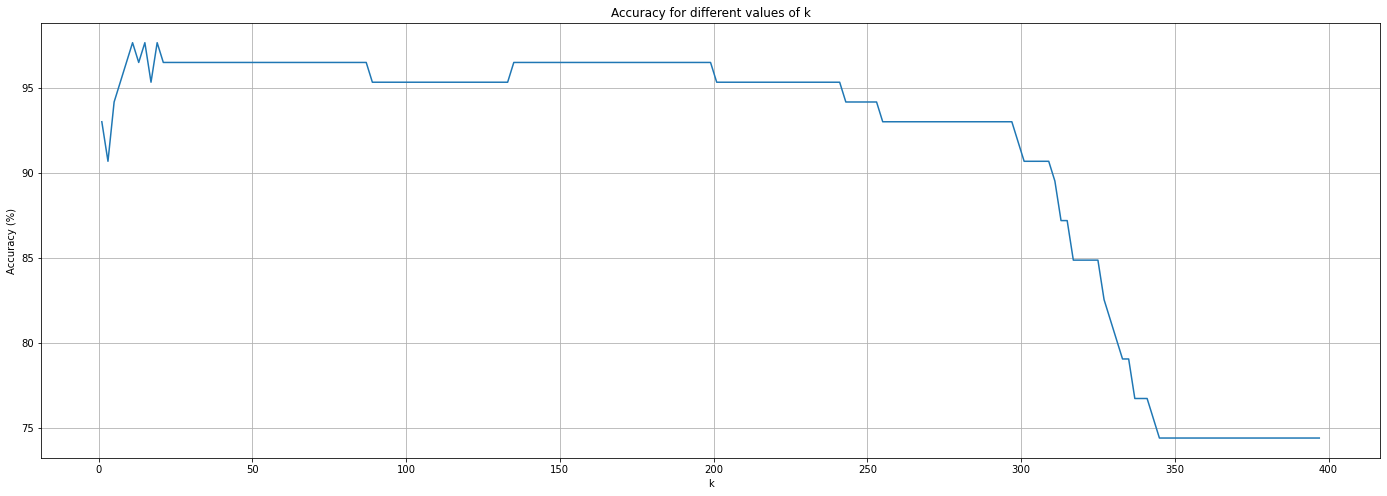

In [147]:
import matplotlib.pyplot as plt

acc_list = []

# values of k to preform kNN regression on
# even values may result in ties
k_range = range(1,len(X_train)+1,2)
for k in k_range:
    val_acc = kNN_classifier(X_train, X_val, y_train, y_val, k)
    acc_list.append(val_acc)

print('Accuracy per k:',[round(f, 2) for f in acc_list],'\n')

plt.figure(figsize=(24,8))
plt.plot(k_range,[i*100 for i in acc_list])
plt.grid()
plt.title('Accuracy for different values of k')
plt.xlabel("k")
plt.ylabel("Accuracy (%)")

# select k that results in the highest accuracy
best_val_acc = np.sort(acc_list)[-1]
idx = np.where(acc_list == best_val_acc)[0]
if len(idx) > 1:
    best_k = [k_range[i] for i in idx]
    print('Multiple ks with best accuracy. Best ks are:',best_k,'with an accuracy of',f'{best_val_acc:.2f}')
else:
    best_k = k_range[idx]
    print('Best k =',best_k,'with an accuracy of',f'{best_val_acc:.2f}')

In [148]:
for k in best_k:
    test_acc = kNN_classifier(X_train, X_test, y_train, y_test, k)
    print(f'k = {k}.',f'Accuracy = {test_acc:.2f}')

k = 11. Accuracy = 0.96
k = 15. Accuracy = 0.95
k = 19. Accuracy = 0.99


### $k$-NN regression

Modify the $k$-NN implementation to do regression instead of classification. Compare the performance of the linear regression model and the $k$-NN regression model on the diabetes dataset for different values of $k$..

In [44]:
def kNN_regressor(X_train, X_eval, y_train, y_eval, sigma_y, mu_y, k):
    """
    
    :param X_train: 2D array containing training dataset.
    :type X_train: np.ndarray
    :param X_eval: 2D array containing dataset to predict targets for.
    :type X_eval: np.ndarray
    :param y_train: Targets of training dataset.
    :type y_train: np.ndarray
    :param y_eval: Targets of dataset to predict targets for.
    :type y_eval: np.ndarray
    :param sigma_y: Standard deviations of all targets in the training dataset.
    :type sigma_y: int or float or np.ndarray
    :param mu_y: Means of all targets in the training dataset.
    :type mu_y: int or float or np.ndarray
    :param k: Hyperparameter determining the number of nearest neighbors to consider.
    :type k: int
    :return: Residual Sum of Squares (RSS) and Mean Square Error (MSE) of the predictions.
    :rtype: (float, float)
    """
    
    # calculate Euclidian distances
    # use Numpy broadcasting to calculate distances without needing to loop over each row
    distance = np.sqrt(((X_train[:,:,np.newaxis]-X_eval[:,:,np.newaxis].T)**2).sum(1))
    
    # sort each row of the distance matrix simultaneously
    sorted_distance = np.argsort(distance, axis = 0)
    
    # pre-allocate memory to store predictions
    y_pred = np.zeros(y_eval.shape)
    
    for row in range(len(X_eval)):
        # select targets of k nearest neighbors for each data point in the evaluation set
        y_kNN = y_train[sorted_distance[:,row][:k]]
        
        # interpolate using equal weights for each neighbor (i.e., the mean value)
        # and reverse standardization to get actual value
        y_pred[row] = np.mean(y_kNN) * sigma_y + mu_y
    
    # evaluate predictions with MSE
    RSS = np.sum((y_eval - y_pred)**2)
    MSE = RSS/len(y_eval)
    
    return RSS, MSE

In [45]:
# Data splitting
# * Train 70%
X_train = diabetes.data[:309, :]
y_train = diabetes.target[:309, np.newaxis]
# * Test 15%
X_test = diabetes.data[309:376, :]
y_test = diabetes.target[309:376, np.newaxis]
# * Val 15%
X_val = diabetes.data[376:, :]
y_val = diabetes.target[376:, np.newaxis]

# normalization with standard scaling
mu = np.mean(X_train,0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu) / sigma

# same mean and sd are used for validation and test set
X_val = (X_val - mu) / sigma
X_test = (X_test - mu) / sigma

# y_train data is also normalized for regression
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0)

y_train = (y_train - mu_y ) / sigma_y

RSS: [429318.0, 303466.75, 239958.0, 215520.88, 212992.72, 222771.47, 228970.37, 223169.44, 205738.47, 191670.97, 192823.47, 181800.73, 182627.86, 182241.92, 181963.77, 177502.54, 178200.64, 180374.47, 188360.02, 194085.52, 194131.58, 199998.65, 200057.3, 203134.93, 208418.8, 208570.7, 210136.79, 212986.33, 212220.74, 211381.81, 212603.63, 215029.54, 217041.75, 218416.14, 217247.91, 218055.76, 218983.68, 218635.88, 216972.7, 215873.69, 215682.4, 215658.86, 216036.23, 215708.83, 216032.68, 216064.42, 215399.16, 217186.98, 219982.98, 220570.24, 219288.83, 218115.05, 219268.72, 217665.43, 217919.8, 218187.17, 218950.3, 218958.13, 218459.5, 217170.03, 217227.8, 218322.93, 218733.73, 219696.43, 221603.63, 222838.23, 222228.31, 223086.55, 223133.62, 224116.57, 223579.66, 223756.36, 223460.04, 224252.88, 224963.37, 224786.5, 225385.65, 225754.41, 227021.43, 227657.4, 229413.28, 230046.11, 231782.65, 232122.21, 230843.87, 231725.45, 232957.09, 234972.66, 235751.76, 234799.55, 234841.71, 235659

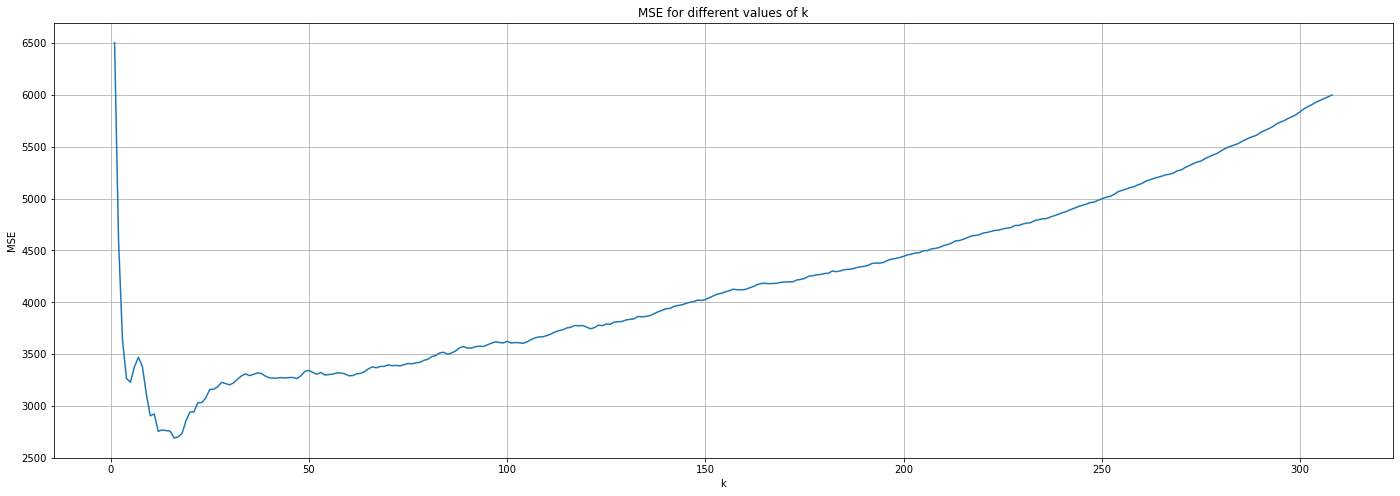

In [46]:
import matplotlib.pyplot as plt

RSS_list = []
MSE_list = []

# values of k to preform kNN regression on
# even values do not result in ties in regression
k_range = range(1,len(X_train)+1)
for k in k_range:
    val_RSS, val_MSE = kNN_regressor(X_train, X_val, y_train, y_val, sigma_y, mu_y, k)
    RSS_list.append(val_RSS)
    MSE_list.append(val_MSE)

print('RSS per k:',[round(f, 2) for f in RSS_list],'\n')
print('MSE per k:',[round(f, 2) for f in MSE_list],'\n')

plt.figure(figsize=(24,8))
plt.plot(k_range,MSE_list)
plt.grid()
plt.title('MSE for different values of k')
plt.xlabel("k")
plt.ylabel("MSE")

# select k that results in the lowest MSE
best_val_MSE = np.sort(MSE_list)[0]
best_k = k_range[np.argsort(MSE_list)[0]]
print('Best k =',best_k,'with a MSE of',f'{best_val_MSE:.2f}')

In [15]:
# perform regression on test set with best k
test_RSS, test_MSE = kNN_regressor(X_train, X_test, y_train, y_test, sigma_y, mu_y, best_k)
print(f'{test_RSS:.2f}', f'{test_MSE:.2f}')

171225.93359375 2555.610949160448


In [34]:
# compare linear regression with kNN regression
print(f'{lr_MSE:.2f}')
print(f'{test_MSE:.2f}')
print(f'{lr_MSE-test_MSE:.2f}')

2794.57
2555.61
238.96


_Using the validation set, the best k for the regression was selected to be 16. Performing the regression on the test dataset while using this value of k, resulted in a MSE of 2555.61. This value is lower than the MSE of the linear regression, which was 2794.57. On this particular dataset, the kNN regression method performs better._

### Class-conditional probability

Compute and visualize the class-conditional probability (conditional probability where the class label is the conditional variable, i.e. $P(X = x \mid Y = y_i)$ for all features in the breast cancer dataset. Assume a Gaussian distribution.

<p><font color='#770a0a'>Based on visual analysis of the plots, which individual feature can best discriminate between the two classes? Motivate your answer.</font></p>

<p><font color='yellow'>Both perimeter and concave points are good features to discriminate between the two classes. The difference between the mean of the concave points for each class are furher apart than for the perimeter. The concave points is thus the best feature to discriminate between both classes.</font></p>



In [ ]:
import matplotlib.pyplot as plt

### Variables
num_values = 300 # Number of plotted values


## store the feature data in breast_cancer_data and the labels in breast_cancer_label
breast_cancer_data = breast_cancer['data']
breast_cancer_label = breast_cancer['target']

## Seperate the feature data in two dataframes, one for Malignant and the other one for benign
breast_cancer_0 = breast_cancer_data[breast_cancer_label == 0]
breast_cancer_1 = breast_cancer_data[breast_cancer_label == 1]

## Calculate the mean and standard deviation for malignant and benign data
breast_cancer_0_mean = np.mean(breast_cancer_0,axis=0)
breast_cancer_0_std = np.std(breast_cancer_0,axis=0)
breast_cancer_1_mean = np.mean(breast_cancer_1,axis=0)
breast_cancer_1_std = np.std(breast_cancer_1,axis=0)

## Creates a list with even distributed points between the first and last value of each feature
breast_cancer_0_norm = np.linspace(np.min(breast_cancer_0,axis=0), np.max(breast_cancer_0,axis=0), num_values)
breast_cancer_1_norm = np.linspace(np.min(breast_cancer_1,axis=0), np.max(breast_cancer_1,axis=0), num_values)

## Calculate the probability density with Gaussian distribution: f(x)=1/(sqrt(2*pi)*std)*epx(-(x-mean)/(2*std^2))
probability_density_0 = 1/(np.sqrt(2*np.pi)*breast_cancer_0_std)*np.exp(-0.5 * ((breast_cancer_0_norm-breast_cancer_0_mean) / breast_cancer_0_std) ** 2)
probability_density_1 = 1/(np.sqrt(2*np.pi)*breast_cancer_1_std)*np.exp(-0.5 * ((breast_cancer_1_norm-breast_cancer_1_mean) / breast_cancer_1_std) ** 2)

## Normalising the probability densities
norm_probability_density_0 = probability_density_0/np.sum(probability_density_0,axis=0)
norm_probability_density_1 = probability_density_1/np.sum(probability_density_1,axis=0)

nrows = 10  # Define the number of rows for the subplots
ncols = 3   # Define the number of columns for the subplots
feature = 0 # Keep track of the feature that is going to be plotted
feature_names = ['radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension']
variable_names = ['Mean ', 'Standard error ', 'Worst ']
fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots
for col in range(ncols):
   for row in range(nrows):
       ax[row,col].plot(breast_cancer_0_norm[:,feature],norm_probability_density_0[:,feature],'b') # Plot the malignant as blue 
       ax[row,col].plot(breast_cancer_1_norm[:,feature],norm_probability_density_1[:,feature],'r') # Plot the benign as red 
       ax[row,col].fill_between(breast_cancer_0_norm[:,feature],norm_probability_density_0[:,feature],color='Blue',alpha=0.3) # Fill the area under the curve
       ax[row,col].fill_between(breast_cancer_1_norm[:,feature],norm_probability_density_1[:,feature],color='Red',alpha=0.3)  # Fill the area under the curve
       ax[row,col].set_xlabel(variable_names[col]+feature_names[row]) # Set the x_label
       ax[row,col].set_ylabel('probability') # Set the y_label
       ax[row,col].legend(['Malignant','Benign']) # Create a legend
       feature+=1 # Update the feature

